In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import  torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
train_dataset=dsets.MNIST(root='./data' ,train=True,transform=transforms.ToTensor())

In [4]:
len(train_dataset)

60000

In [5]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [6]:
train_dataset[0][1]

tensor(5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [9]:
show_img=train_dataset[0][0].numpy().reshape(28,28)

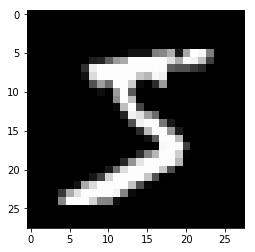

In [10]:
plt.imshow(show_img,cmap='gray')

In [11]:
# train_dataset has image pixels and labels as a tuple

In [12]:
test_dataset=dsets.MNIST(root='./data' ,train=False,transform=transforms.ToTensor())

In [13]:
len(test_dataset)

10000

In [14]:
type(test_dataset[0])

tuple

In [16]:
batch_size=100

n_iters=3000

num_epochs=n_iters/(len(train_dataset)/batch_size)

In [19]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

In [21]:
import collections
isinstance(train_loader,collections.Iterable)

True

In [22]:
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size)

In [23]:
isinstance(test_loader,collections.Iterable)

True

###  Building Model

In [98]:
class LogisticRegressionModel(nn.Module):
#     input_dim is x and output_dim is y
    def __init__(self,input_dim,output_dim):
        super(LogisticRegressionModel,self).__init__()
        self.Linear=nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out=self.Linear(x)
        return out

In [99]:
train_dataset[0][0].size()
# flatten this one to 784 so that our model can interpret it

torch.Size([1, 28, 28])

In [100]:
input_dim=28*28
output_dim=10
model=LogisticRegressionModel(input_dim,output_dim)

In [101]:
criterion=nn.CrossEntropyLoss()

In [102]:
learning_rate=.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [103]:
print(model.parameters())

<generator object Module.parameters at 0x00000029F0D17FC0>


In [104]:
print(len(list(model.parameters())))

2


In [105]:
# In y=A*x+b

# A

In [106]:

print(list(model.parameters())[0].size())
# Weights

torch.Size([10, 784])


# B

In [107]:
print(list(model.parameters())[1].size())
# Bias

torch.Size([10])


# Build Model

In [108]:
iter=0
for epoch in range(int(num_epochs)):
    for i,(images,labels) in enumerate(train_loader):
        images=Variable(images.view(-1,28*28))
#         print(images.size())
        labels=Variable(labels)
        
        optimizer.zero_grad()
        
        outputs=model(images)
        
        loss=criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter+=1
        
        if iter%500==0:
            correct=0
            total=0
            
            for images,labels in test_loader:
                images=Variable(images.view(-1,28*28))
                outputs=model(images)
                
                _,predicted=torch.max(outputs.data,1)
                
                total+=labels.size(0)
                
                correct+=(predicted==labels).sum()
            accuracy=100*correct/total
            
            print('Iterations {}. Loss {}. Acuracy {}.'.format(iter,loss.data[0],accuracy))

C:\Users\ashis.panda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iterations 500. Loss 1.9107856750488281. Acuracy 68.
Iterations 1000. Loss 1.5539742708206177. Acuracy 76.
Iterations 1500. Loss 1.3121310472488403. Acuracy 79.
Iterations 2000. Loss 1.1845715045928955. Acuracy 80.
Iterations 2500. Loss 0.917949378490448. Acuracy 82.
Iterations 3000. Loss 0.9815507531166077. Acuracy 82.
